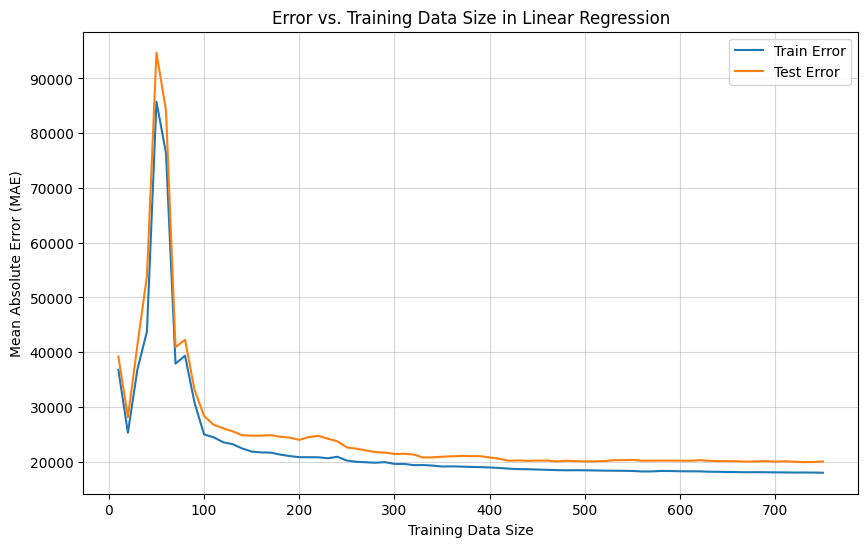


Final Results:
Train MAE: 18009.19, Train R²: 0.57
Test MAE: 20059.37, Test R²: 0.45


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load and preprocess the data
data = pd.read_excel('modified_data.xlsx').drop_duplicates()
data = data[
    (data['Property type_Apartments'] == 1) & 
    (data['Price'] <= 200000) & 
    (data['Gross area'] <= 250)
]

# Normalize features
scaler = MinMaxScaler()
data[['Year of construction']] = scaler.fit_transform(data[['Year of construction']])

# Split data into features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Variables to track errors
train_errors = []
test_errors = []

# Iterative training
batch_size = 10
for i in range(batch_size, len(X_train) + 1, batch_size):
    X_train_subset = X_train[:i]
    y_train_subset = y_train[:i]
    
    # Train the model on a subset
    model.fit(X_train_subset, y_train_subset)
    
    # Predict on the training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate and store errors
    train_errors.append(mean_absolute_error(y_train, train_pred))
    test_errors.append(mean_absolute_error(y_test, test_pred))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(range(batch_size, len(X_train) + 1, batch_size), train_errors, label="Train Error")
plt.plot(range(batch_size, len(X_train) + 1, batch_size), test_errors, label="Test Error")
plt.title("Error vs. Training Data Size in Linear Regression")
plt.xlabel("Training Data Size")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Final evaluation
final_train_pred = model.predict(X_train)
final_test_pred = model.predict(X_test)

final_mae_train = mean_absolute_error(y_train, final_train_pred)
final_mae_test = mean_absolute_error(y_test, final_test_pred)
final_r2_train = r2_score(y_train, final_train_pred)
final_r2_test = r2_score(y_test, final_test_pred)

print("\nFinal Results:")
print(f"Train MAE: {final_mae_train:.2f}, Train R²: {final_r2_train:.2f}")
print(f"Test MAE: {final_mae_test:.2f}, Test R²: {final_r2_test:.2f}")


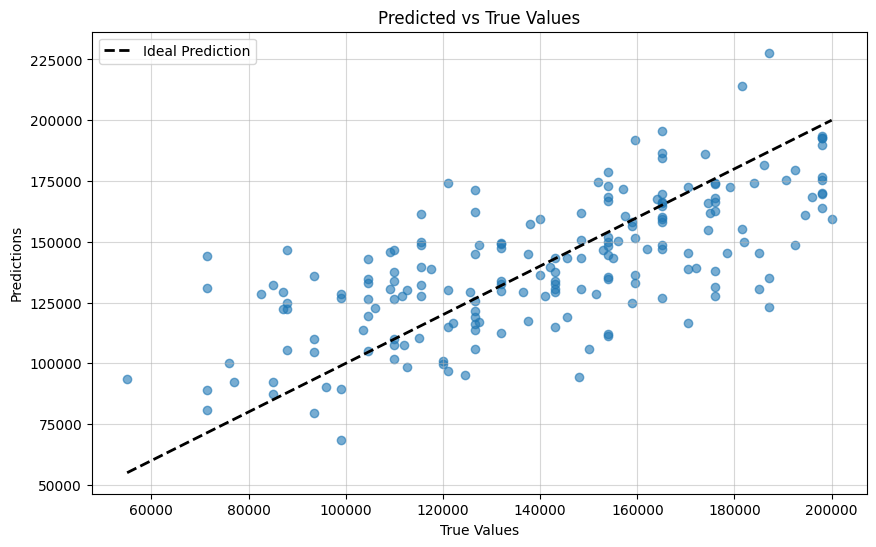

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Prediction")
plt.title("Predicted vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

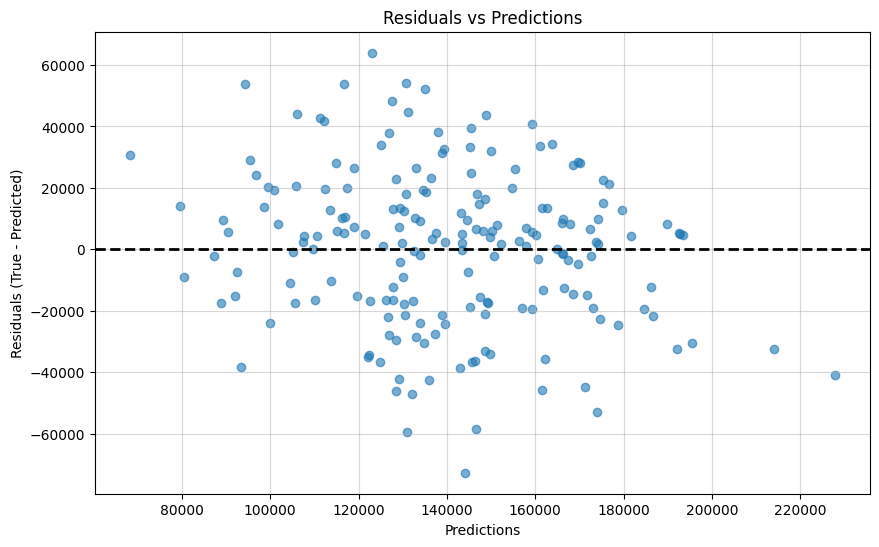

In [14]:
residuals = y_test - final_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(final_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals (True - Predicted)")
plt.grid(alpha=0.5)
plt.show()

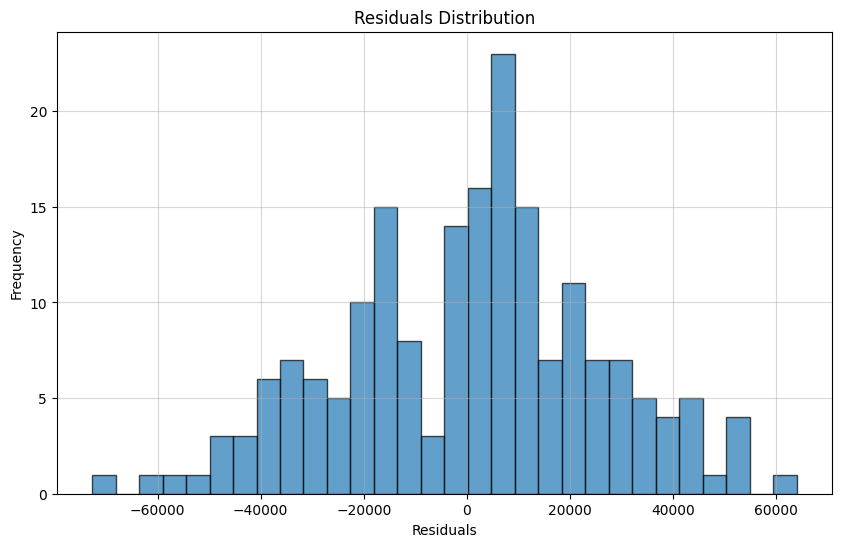

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(alpha=0.5)
plt.show()


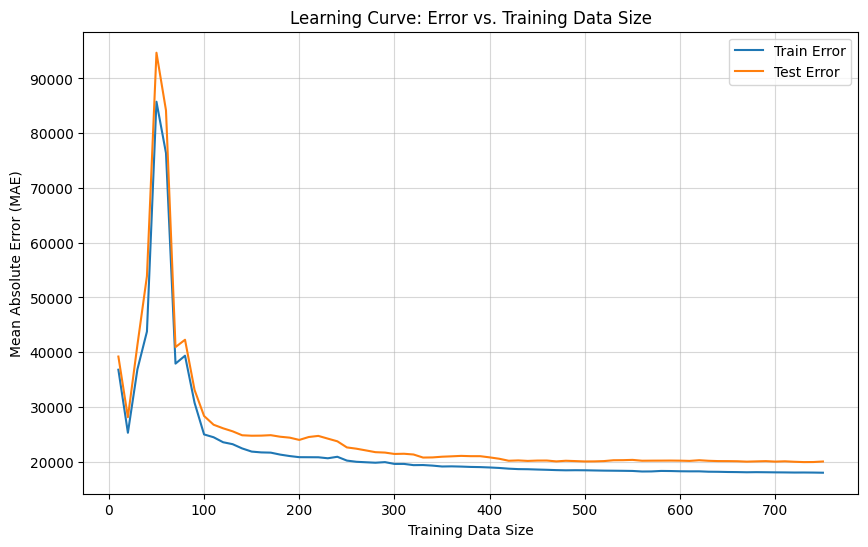

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(batch_size, len(X_train) + 1, batch_size), train_errors, label="Train Error")
plt.plot(range(batch_size, len(X_train) + 1, batch_size), test_errors, label="Test Error")
plt.title("Learning Curve: Error vs. Training Data Size")
plt.xlabel("Training Data Size")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

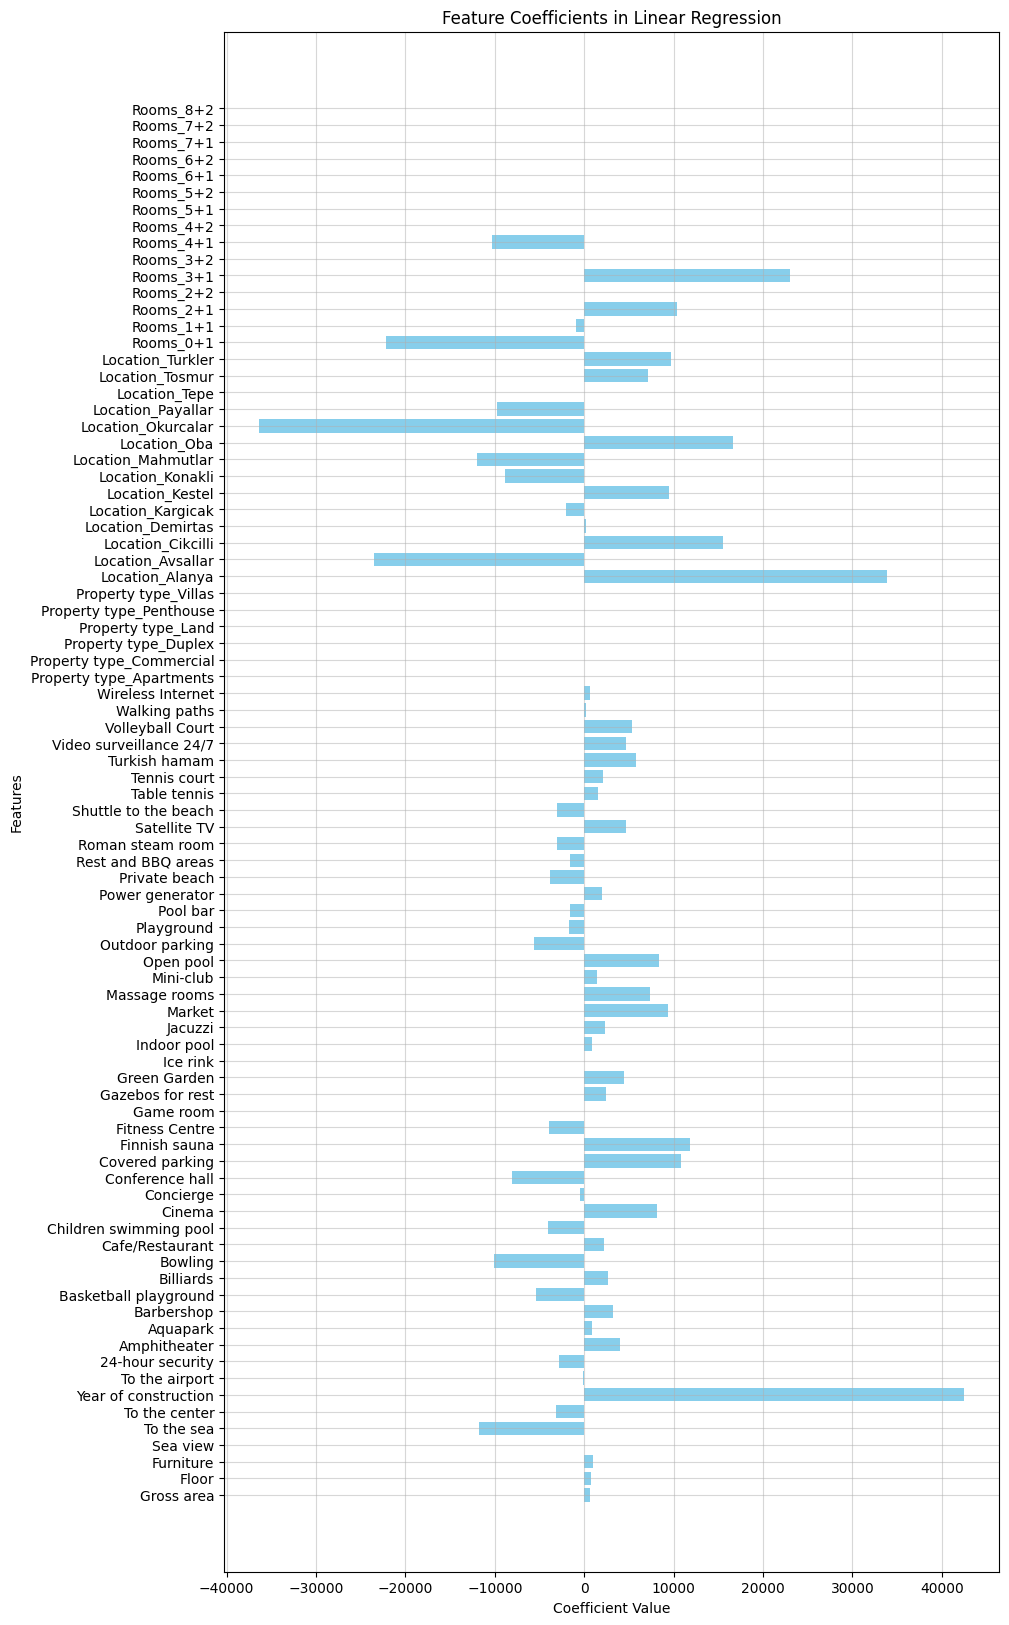

In [19]:
feature_names = X.columns
coefficients = model.coef_

plt.figure(figsize=(10, 20))
plt.barh(feature_names, coefficients, color='skyblue')
plt.title("Feature Coefficients in Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(alpha=0.5)
plt.show()

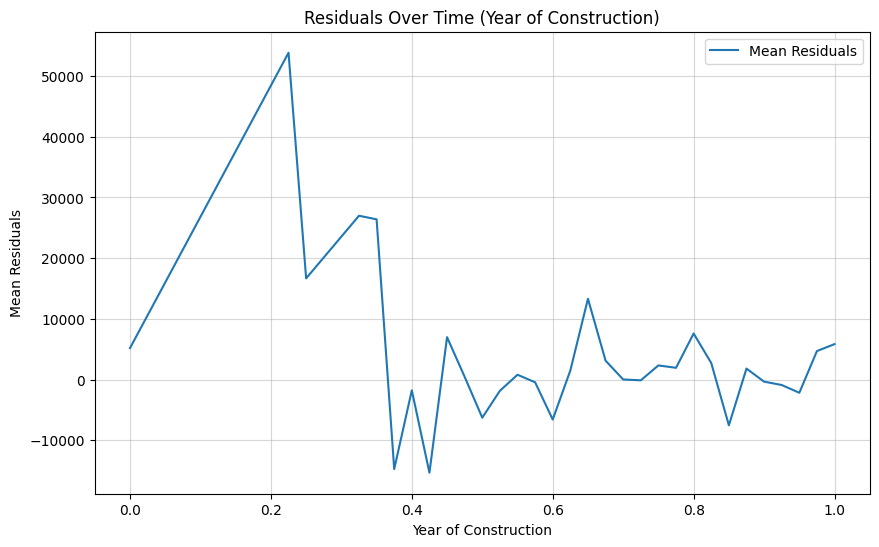

In [20]:
data['Predictions'] = model.predict(X)
data['Residuals'] = data['Price'] - data['Predictions']

# Group by year
grouped = data.groupby('Year of construction')['Residuals'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, label="Mean Residuals")
plt.title("Residuals Over Time (Year of Construction)")
plt.xlabel("Year of Construction")
plt.ylabel("Mean Residuals")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

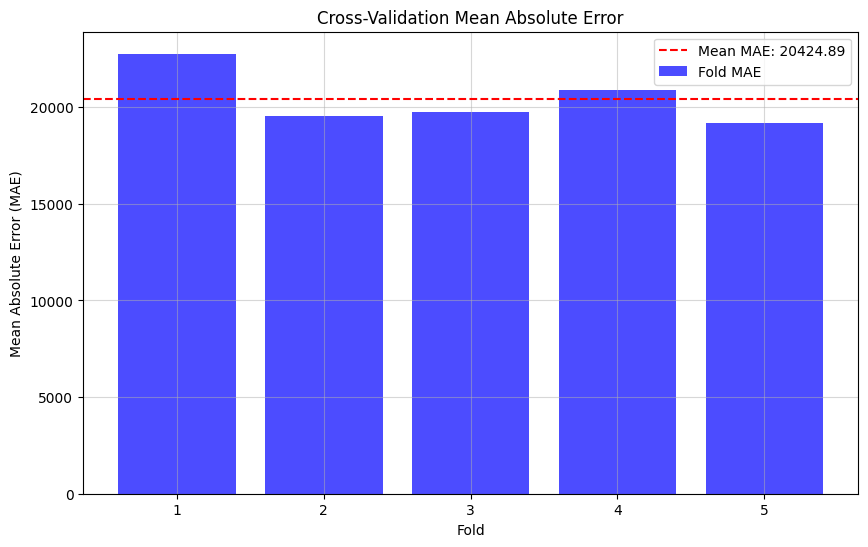


Cross-Validation Results:
MAE for each fold: [22768.91684704 19554.53617853 19727.62982062 20903.54931229
 19169.80495431]
Mean MAE: 20424.89

Test Set Results:
Test MAE: 19980.54
Test R²: 0.45


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the data
data = pd.read_excel('modified_data.xlsx').drop_duplicates()
data = data[
    (data['Property type_Apartments'] == 1) & 
    (data['Price'] <= 200000) & 
    (data['Gross area'] <= 250)
]

# Normalize features
scaler = MinMaxScaler()
data[['Year of construction']] = scaler.fit_transform(data[['Year of construction']])

# Split data into features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Initialize the Linear Regression model
model = LinearRegression()

# Perform Cross-Validation
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(mean_absolute_error, greater_is_better=False)  # Negative MAE
)

# Convert negative MAE scores to positive
cv_scores = -cv_scores
cv_mean = cv_scores.mean()

# Final Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
test_pred = model.predict(X_test)

# Calculate Test Set Metrics
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

# Plot Cross-Validation Results
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='blue', alpha=0.7, label="Fold MAE")
plt.axhline(cv_mean, color='red', linestyle='--', label=f"Mean MAE: {cv_mean:.2f}")
plt.title("Cross-Validation Mean Absolute Error")
plt.xlabel("Fold")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# Print Results
print("\nCross-Validation Results:")
print(f"MAE for each fold: {cv_scores}")
print(f"Mean MAE: {cv_mean:.2f}")

print("\nTest Set Results:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R²: {test_r2:.2f}")
